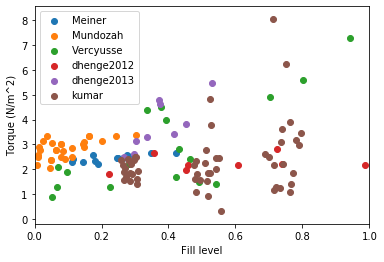

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

datafile = pd.read_csv('dataFiles/test_data1_WithOutputs_withCalculatedValues.csv')
torque = np.array(datafile["DetTorque"])
mrtDET = np.array(datafile["DetMRT"])
fill_level = np.array(datafile["Calc Fill level"])
exp = np.array(datafile["Experiments"])
lsratio = np.array(datafile["L/S Ratio"])
feedrate = np.array(datafile["FlowRate (kg/hr)"])
rpm = np.array(datafile["RPM (1/s)"])
omega = rpm * np.pi / 30
fig,ax = plt.subplots()
for g in np.unique(exp):
    i = np.where(exp==g)
    ax.scatter(fill_level[i],torque[i],label=g)
plt.xlabel('Fill level')
plt.ylabel('Torque (N/m^2)')
plt.xlim(0,1)
ax.legend()

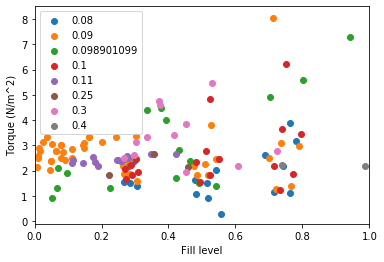

In [2]:
fig,ax = plt.subplots()
for g in np.unique(lsratio):
    i = np.where(lsratio==g)
    ax.scatter(fill_level[i],torque[i],label=g)
plt.xlabel('Fill level')
plt.ylabel('Torque (N/m^2)')
plt.xlim(0,1)
ax.legend()

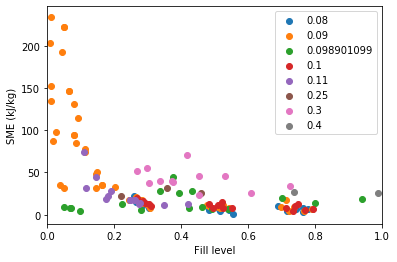

In [3]:
sme = np.divide(np.multiply(torque,omega),feedrate)
fig,ax = plt.subplots()
for g in np.unique(lsratio):
    i = np.where(lsratio==g)
    ax.scatter(fill_level[i],sme[i],label=g)
plt.xlabel('Fill level')
plt.ylabel('SME (kJ/kg)')
plt.xlim(0,1)
ax.legend()

Text(0, 0.5, 'Fill level')

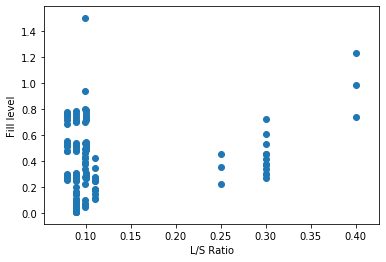

In [4]:
plt.figure()
plt.scatter(lsratio,fill_level)
plt.xlabel('L/S Ratio')
plt.ylabel('Fill level')

Text(0, 0.5, 'SME (kJ/kg)')

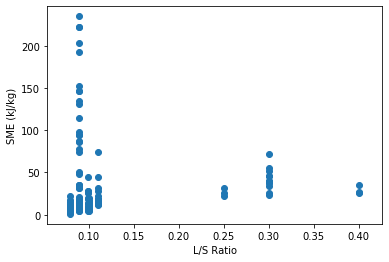

In [5]:
plt.figure()
plt.scatter(lsratio,sme)
plt.xlabel('L/S Ratio')
plt.ylabel('SME (kJ/kg)')

Text(0.5, 0, 'SME (kJ/kg)')

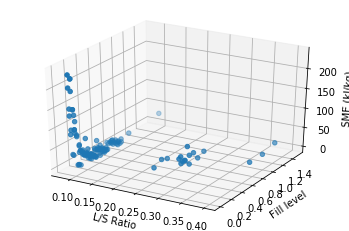

In [6]:
from mpl_toolkits.mplot3d import axes3d
from IPython import get_ipython
# get_ipython().run_line_magic('matplotlib', 'qt')
ax = plt.axes(projection='3d')
ax.scatter3D(lsratio, fill_level,sme)
ax.set_xlabel('L/S Ratio')
ax.set_ylabel('Fill level')
ax.set_zlabel('SME (kJ/kg)')
# plt.show()

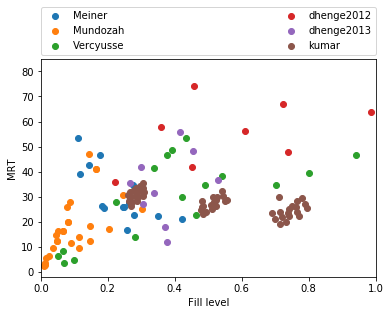

In [7]:
fig,ax = plt.subplots()
for g in np.unique(exp):
    i = np.where(exp==g)
    ax.scatter(fill_level[i],mrtDET[i],label=g)
plt.xlabel('Fill level')
plt.ylabel('MRT')
plt.xlim(0,1)
ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=2, mode="expand", borderaxespad=0.)

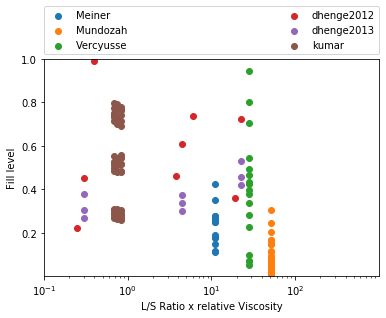

In [8]:
fig,ax = plt.subplots()
vis = np.array(datafile['Binder Viscosity (mPa.s)']) / 0.001
for g in np.unique(exp):
    i = np.where(exp==g)
    ax.scatter(lsratio[i]*vis[i],fill_level[i],label=g)
plt.xlabel('L/S Ratio x relative Viscosity')
plt.ylabel('Fill level')
plt.ylim(0,1)
plt.ylim([1e-4,1])
plt.xscale("log")
plt.xlim([1e-1,1000])
plt.xticks([1e-1,1e0,1e1,1e2])
ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=2, mode="expand", borderaxespad=0.)

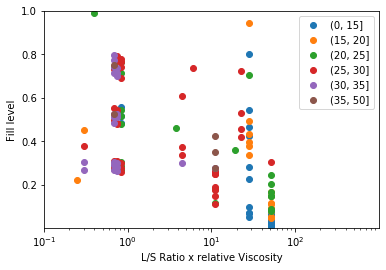

In [9]:
fig,ax = plt.subplots()
vis = np.array(datafile['Binder Viscosity (mPa.s)']) / 0.001
extent = np.array(datafile['Extent of gran'])
ranges = [0,15,20,25,30,35,50]
groups = datafile.groupby(pd.cut(datafile['Extent of gran'],ranges))
for val, group in groups:
        ax.scatter(group['L/S Ratio']*group['Binder Viscosity (mPa.s)'] / 0.001, group['Calc Fill level'],label=val)
# ax.scatter(np.multiply(lsratio,vis),fill_level,c=extent,s=150,cmap='YlOrRd')
plt.xlabel('L/S Ratio x relative Viscosity')
plt.ylabel('Fill level')
plt.ylim(0,1)
plt.ylim([1e-4,1])
plt.xscale("log")
plt.xlim([1e-1,1000])
plt.xticks([1e-1,1e0,1e1,1e2])
plt.legend()
# ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
#            ncol=2, mode="expand", borderaxespad=0.)

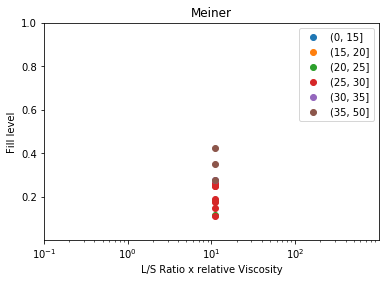

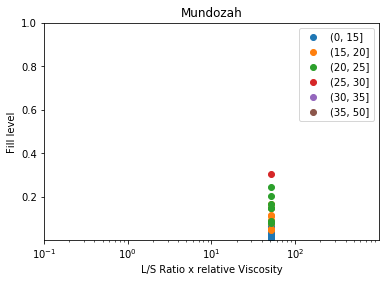

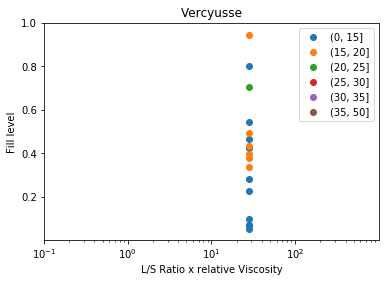

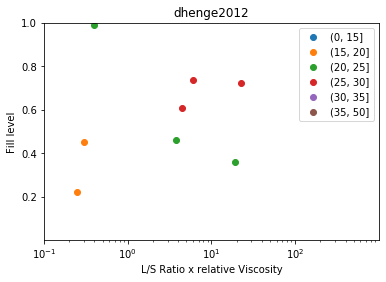

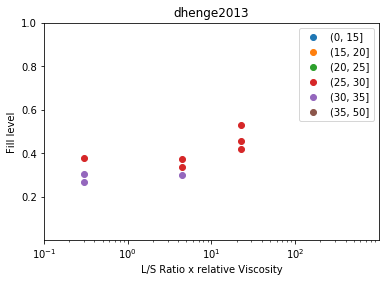

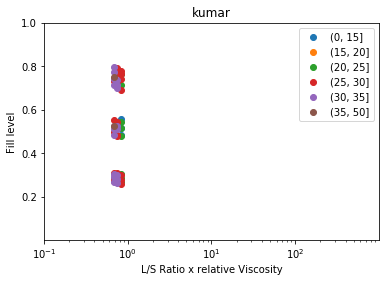

In [11]:
vis = np.array(datafile['Binder Viscosity (mPa.s)']) / 0.001
extent = np.array(datafile['Extent of gran'])
ranges = [0,15,20,25,30,35,50]
count = 0
y = 0
for region, df_region in datafile.groupby('Experiments'):
    groups = df_region.groupby(pd.cut(df_region['Extent of gran'],ranges))
    plt.figure()
    plt.title(region)
    plt.xlabel('L/S Ratio x relative Viscosity')
    plt.ylabel('Fill level')
    plt.ylim(0,1)
    plt.ylim([1e-4,1])
    plt.xscale("log")
    plt.xlim([1e-1,1000])
    plt.xticks([1e-1,1e0,1e1,1e2])
    
    for val, group in groups:
        plt.scatter(group['L/S Ratio']*group['Binder Viscosity (mPa.s)'] / 0.001, group['Calc Fill level'],label=val)
        plt.legend()

# ax.scatter(np.multiply(lsratio,vis),fill_level,c=extent,s=150,cmap='YlOrRd')


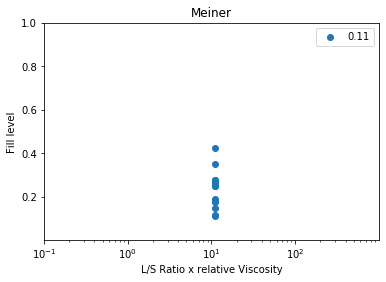

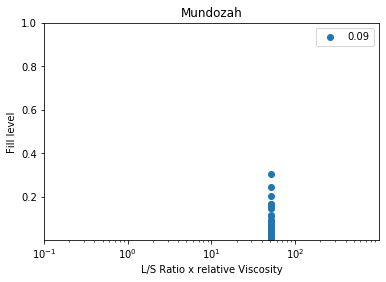

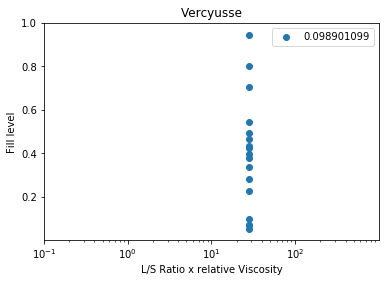

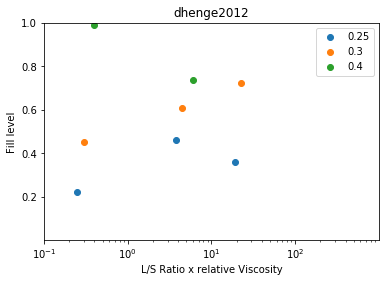

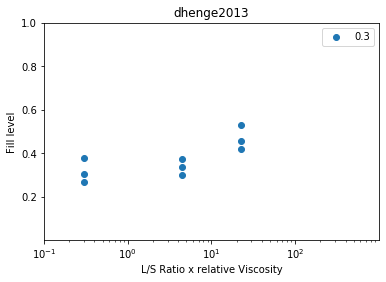

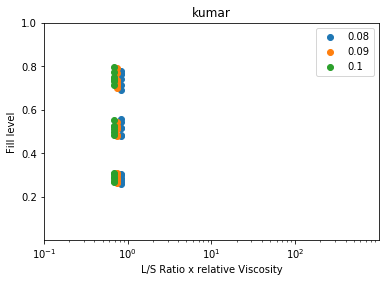

In [12]:
vis = np.array(datafile['Binder Viscosity (mPa.s)']) / 0.001
extent = np.array(datafile['Extent of gran'])
ranges = [0,15,20,25,30,35,50]
count = 0
y = 0
for region, df_region in datafile.groupby('Experiments'):
    groups = df_region.groupby(df_region['L/S Ratio'])
    plt.figure()
    plt.title(region)
    plt.xlabel('L/S Ratio x relative Viscosity')
    plt.ylabel('Fill level')
    plt.ylim(0,1)
    plt.ylim([1e-4,1])
    plt.xscale("log")
    plt.xlim([1e-1,1000])
    plt.xticks([1e-1,1e0,1e1,1e2])
    
    for val, group in groups:
        plt.scatter(group['L/S Ratio']*group['Binder Viscosity (mPa.s)'] / 0.001, group['Calc Fill level'],label=val)
        plt.legend()

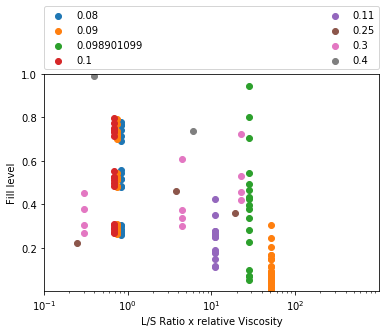

In [13]:
fig,ax = plt.subplots()
vis = np.array(datafile['Binder Viscosity (mPa.s)']) / 0.001
for g in np.unique(lsratio):
    i = np.where(lsratio==g)
    ax.scatter(lsratio[i]*vis[i],fill_level[i],label=g)
plt.xlabel('L/S Ratio x relative Viscosity')
plt.ylabel('Fill level')
plt.ylim(0,1)
plt.ylim([1e-4,1])
plt.xscale("log")
plt.xlim([1e-1,1000])
plt.xticks([1e-1,1e0,1e1,1e2])
ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=2, mode="expand", borderaxespad=0.)

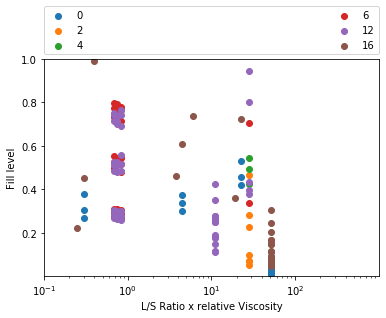

In [14]:
fig,ax = plt.subplots()
vis = np.array(datafile['Binder Viscosity (mPa.s)']) / 0.001
nKe = np.array(datafile['n KE'])
for g in np.unique(nKe):
    i = np.where(nKe==g)
    ax.scatter(lsratio[i]*vis[i],fill_level[i],label=g)
plt.xlabel('L/S Ratio x relative Viscosity')
plt.ylabel('Fill level')
plt.ylim(0,1)
plt.ylim([1e-4,1])
plt.xscale("log")
plt.xlim([1e-1,1000])
plt.xticks([1e-1,1e0,1e1,1e2])
ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=2, mode="expand", borderaxespad=0.)

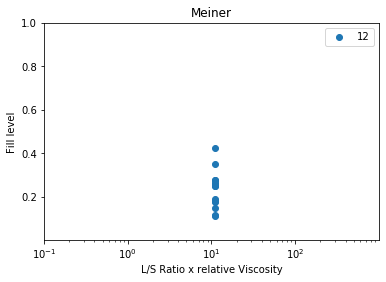

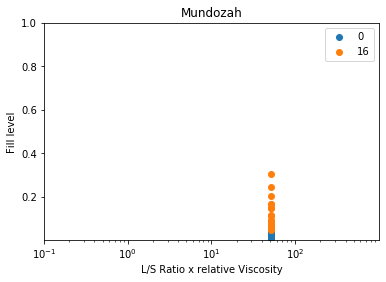

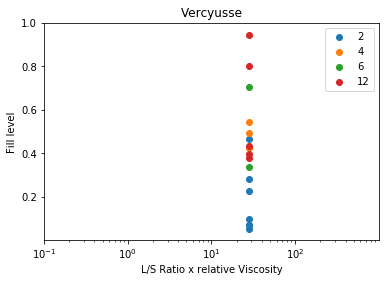

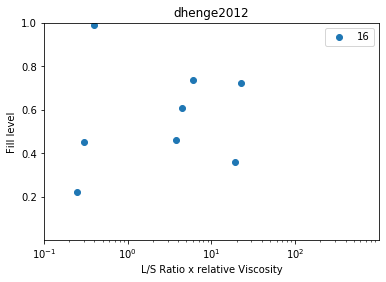

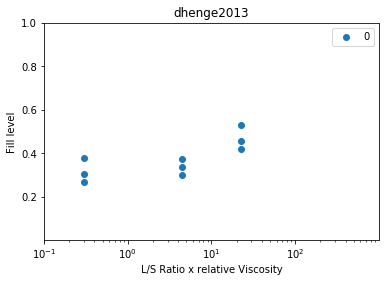

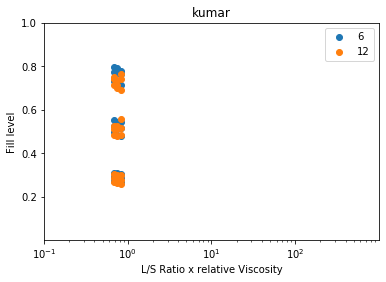

In [15]:
vis = np.array(datafile['Binder Viscosity (mPa.s)']) / 0.001
extent = np.array(datafile['Extent of gran'])
ranges = [0,15,20,25,30,35,50]
count = 0
y = 0
for region, df_region in datafile.groupby('Experiments'):
    groups = df_region.groupby(df_region['n KE'])
    plt.figure()
    plt.title(region)
    plt.xlabel('L/S Ratio x relative Viscosity')
    plt.ylabel('Fill level')
    plt.ylim(0,1)
    plt.ylim([1e-4,1])
    plt.xscale("log")
    plt.xlim([1e-1,1000])
    plt.xticks([1e-1,1e0,1e1,1e2])
    
    for val, group in groups:
        plt.scatter(group['L/S Ratio']*group['Binder Viscosity (mPa.s)'] / 0.001, group['Calc Fill level'],label=val)
        plt.legend()

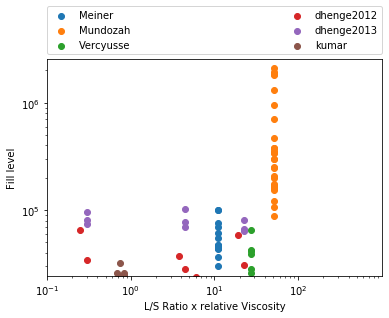

In [18]:
fig,ax = plt.subplots()
vis = np.array(datafile['Binder Viscosity (mPa.s)']) / 0.001
nKe = np.array(datafile['n KE'])
torque = np.array(datafile['DetTorque'])
fillVol = np.array(datafile['Calc Fill volume']) / 1e9
for g in np.unique(exp):
    i = np.where(exp==g)
    ax.scatter(lsratio[i]*vis[i],torque[i]/fillVol[i],label=g)
plt.xlabel('L/S Ratio x relative Viscosity')
plt.ylabel('Torque / Fill Vol')
plt.xscale("log")
plt.yscale("log")
plt.xlim([1e-1,1000])
plt.xticks([1e-1,1e0,1e1,1e2])
ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=2, mode="expand", borderaxespad=0.)

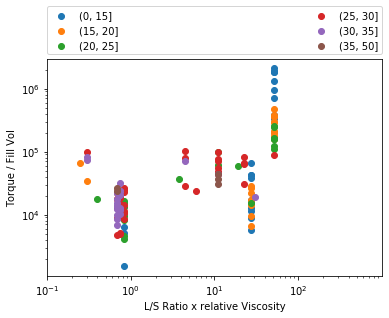

In [20]:

fig,ax = plt.subplots()
vis = np.array(datafile['Binder Viscosity (mPa.s)']) / 0.001
nKe = np.array(datafile['n KE'])
torque = np.array(datafile['DetTorque'])
fillVol = np.array(datafile['Calc Fill volume']) / 1e9
ranges = [0,15,20,25,30,35,50]
groups = datafile.groupby(pd.cut(datafile['Extent of gran'],ranges))
for val, group in groups:
        ax.scatter(group['L/S Ratio']*group['Binder Viscosity (mPa.s)'] / 0.001, group['DetTorque']/(group['Calc Fill volume']/1e9),label=val)
plt.xlabel('L/S Ratio x relative Viscosity')
plt.ylabel('Torque / Fill Vol')
plt.xscale("log")
plt.yscale("log")
plt.xlim([1e-1,1000])
plt.xticks([1e-1,1e0,1e1,1e2])
ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=2, mode="expand", borderaxespad=0.)

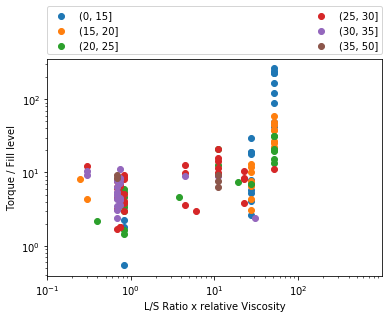

In [23]:
fig,ax = plt.subplots()
vis = np.array(datafile['Binder Viscosity (mPa.s)']) / 0.001
nKe = np.array(datafile['n KE'])
torque = np.array(datafile['DetTorque'])
fillVol = np.array(datafile['Calc Fill volume']) / 1e9
ranges = [0,15,20,25,30,35,50]
groups = datafile.groupby(pd.cut(datafile['Extent of gran'],ranges))
for val, group in groups:
        ax.scatter(group['L/S Ratio']*group['Binder Viscosity (mPa.s)'] / 0.001, group['DetTorque']/(group['Calc Fill level']),label=val)
plt.xlabel('L/S Ratio x relative Viscosity')
plt.ylabel('Torque / Fill level')
plt.xscale("log")
plt.yscale("log")
plt.xlim([1e-1,1000])
plt.xticks([1e-1,1e0,1e1,1e2])
ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=2, mode="expand", borderaxespad=0.)